# Da Terra ao Código: Classificação de Grãos com Machine Learning

Este notebook segue a metodologia **CRISP-DM** para desenvolver um modelo de aprendizado de máquina que classifique variedades de grãos de trigo com base em suas características físicas.

---
## Etapas:
1. Análise e Pré-processamento dos Dados
2. Implementação e Comparação de Algoritmos
3. Otimização dos Modelos
4. Interpretação dos Resultados


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Carregar o Seeds Dataset
columns = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width', 'Asymmetry_Coeff', 'Kernel_Groove_Length', 'Class']
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None, names=columns, skipinitialspace=True)

# Exibir as primeiras linhas
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2315157085.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None, names=columns, skipinitialspace=True)


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Acessar o modelo SVM treinado
svm_model = models['SVM']

# Calcular a Permutation Importance
# Usamos X_test e y_test para avaliar a importância em dados não vistos
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# Obter os nomes das features
feature_names = X.columns

# Criar um DataFrame para melhor visualização
svm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Ordenar por importância
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False)

print("Permutation Importance das Features para o SVM:")
display(svm_importance_df)

NameError: name 'models' is not defined

Os resultados acima mostram a Permutation Importance de cada característica para o modelo SVM, ordenadas da mais importante para a menos importante. Isso nos permite comparar a relevância das features entre os modelos Random Forest e SVM.

In [ ]:
# Acessar o modelo Random Forest treinado
rf_model = models['Random Forest']

# Obter a importância das features
feature_importances = rf_model.feature_importances_

# Obter os nomes das features
feature_names = X.columns

# Criar um DataFrame para melhor visualização
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Importância das Features para o Random Forest:")
display(importance_df)

Importância das Features para o Random Forest:


,Feature,Importance
6,Kernel_Groove_Length,0.195056
0,Area,0.185252
1,Perimeter,0.175218
4,Kernel_Width,0.160960
3,Kernel_Length,0.117488
2,Compactness,0.088420
5,Asymmetry_Coeff,0.077605


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=importance_df)

Os resultados acima mostram a importância de cada característica (feature) para o modelo Random Forest, ordenadas da mais importante para a menos importante. Isso nos ajuda a entender quais características o modelo considerou mais relevantes para fazer suas previsões.

In [ ]:
# Estatísticas descritivas
print(df.describe())
print("Medianas:\n", df.median())
print("Desvios padrão:\n", df.std())

             Area   Perimeter  Compactness  Kernel_Length  Kernel_Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry_Coeff  Kernel_Groove_Length       Class  
count       210.000000            210.000000  210.000000  
mean          3.700201              5.408071    2.000000  
std           1.503557              0.491480    0.818448  
min           0.765100              4.519000    1.000000  
25%           2.561500       

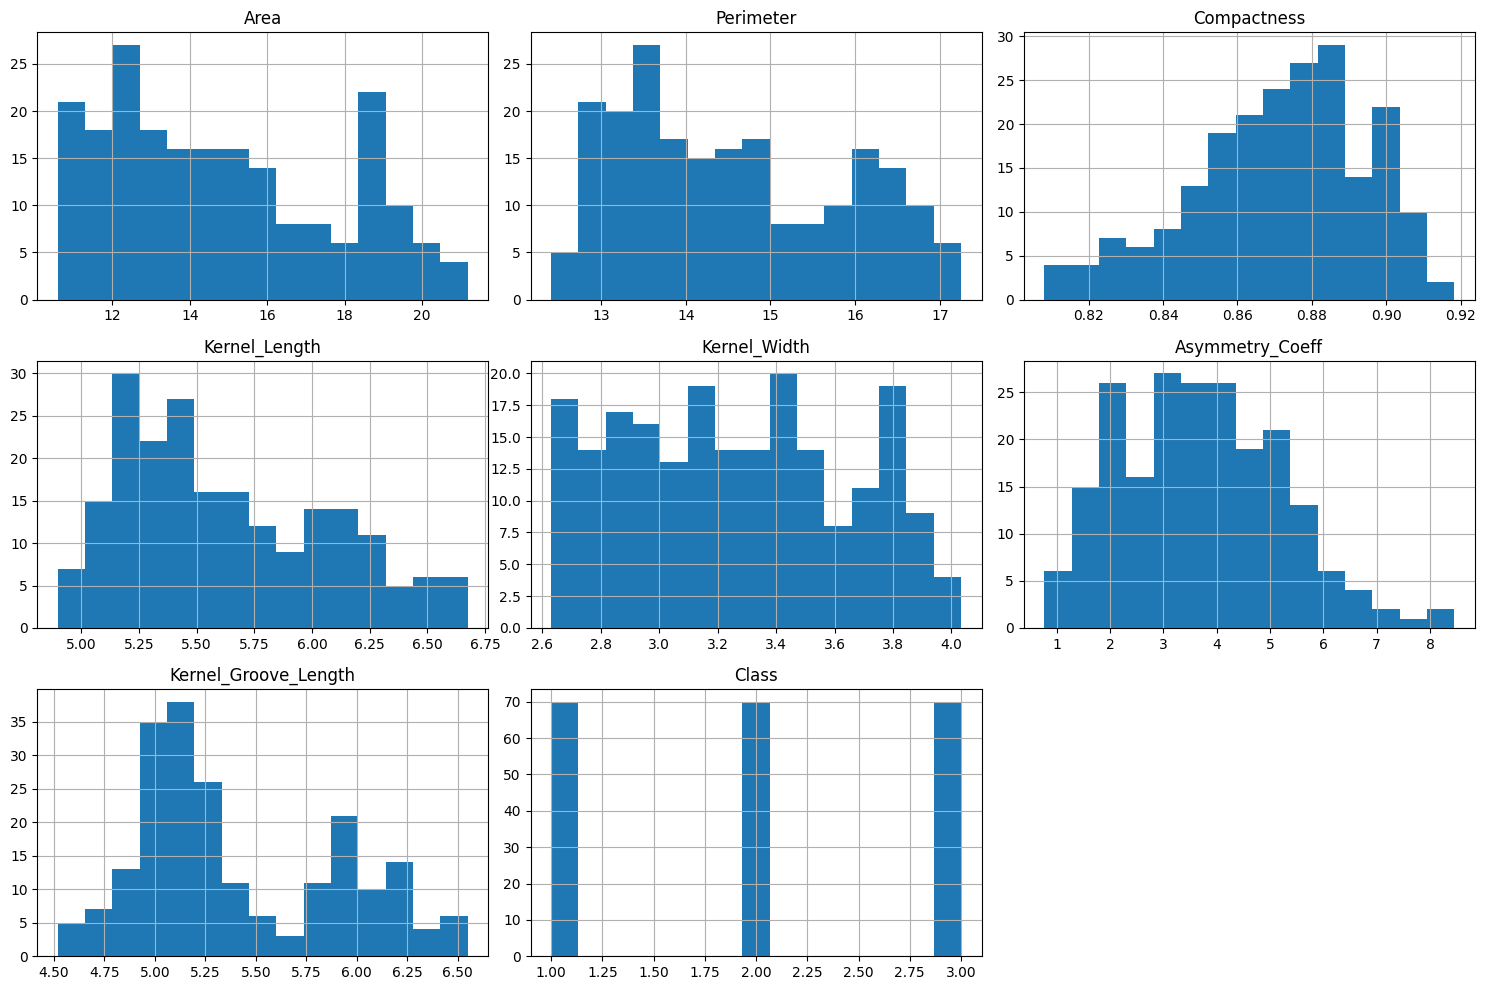

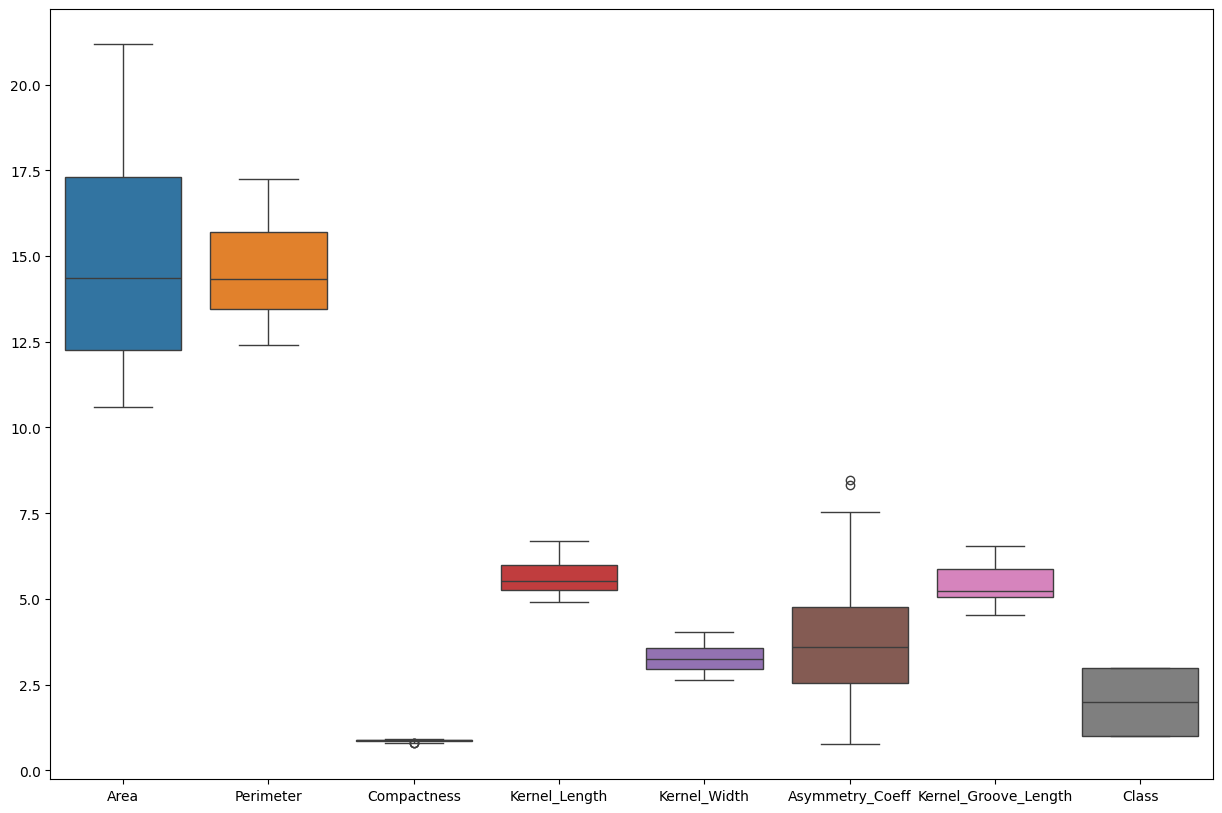

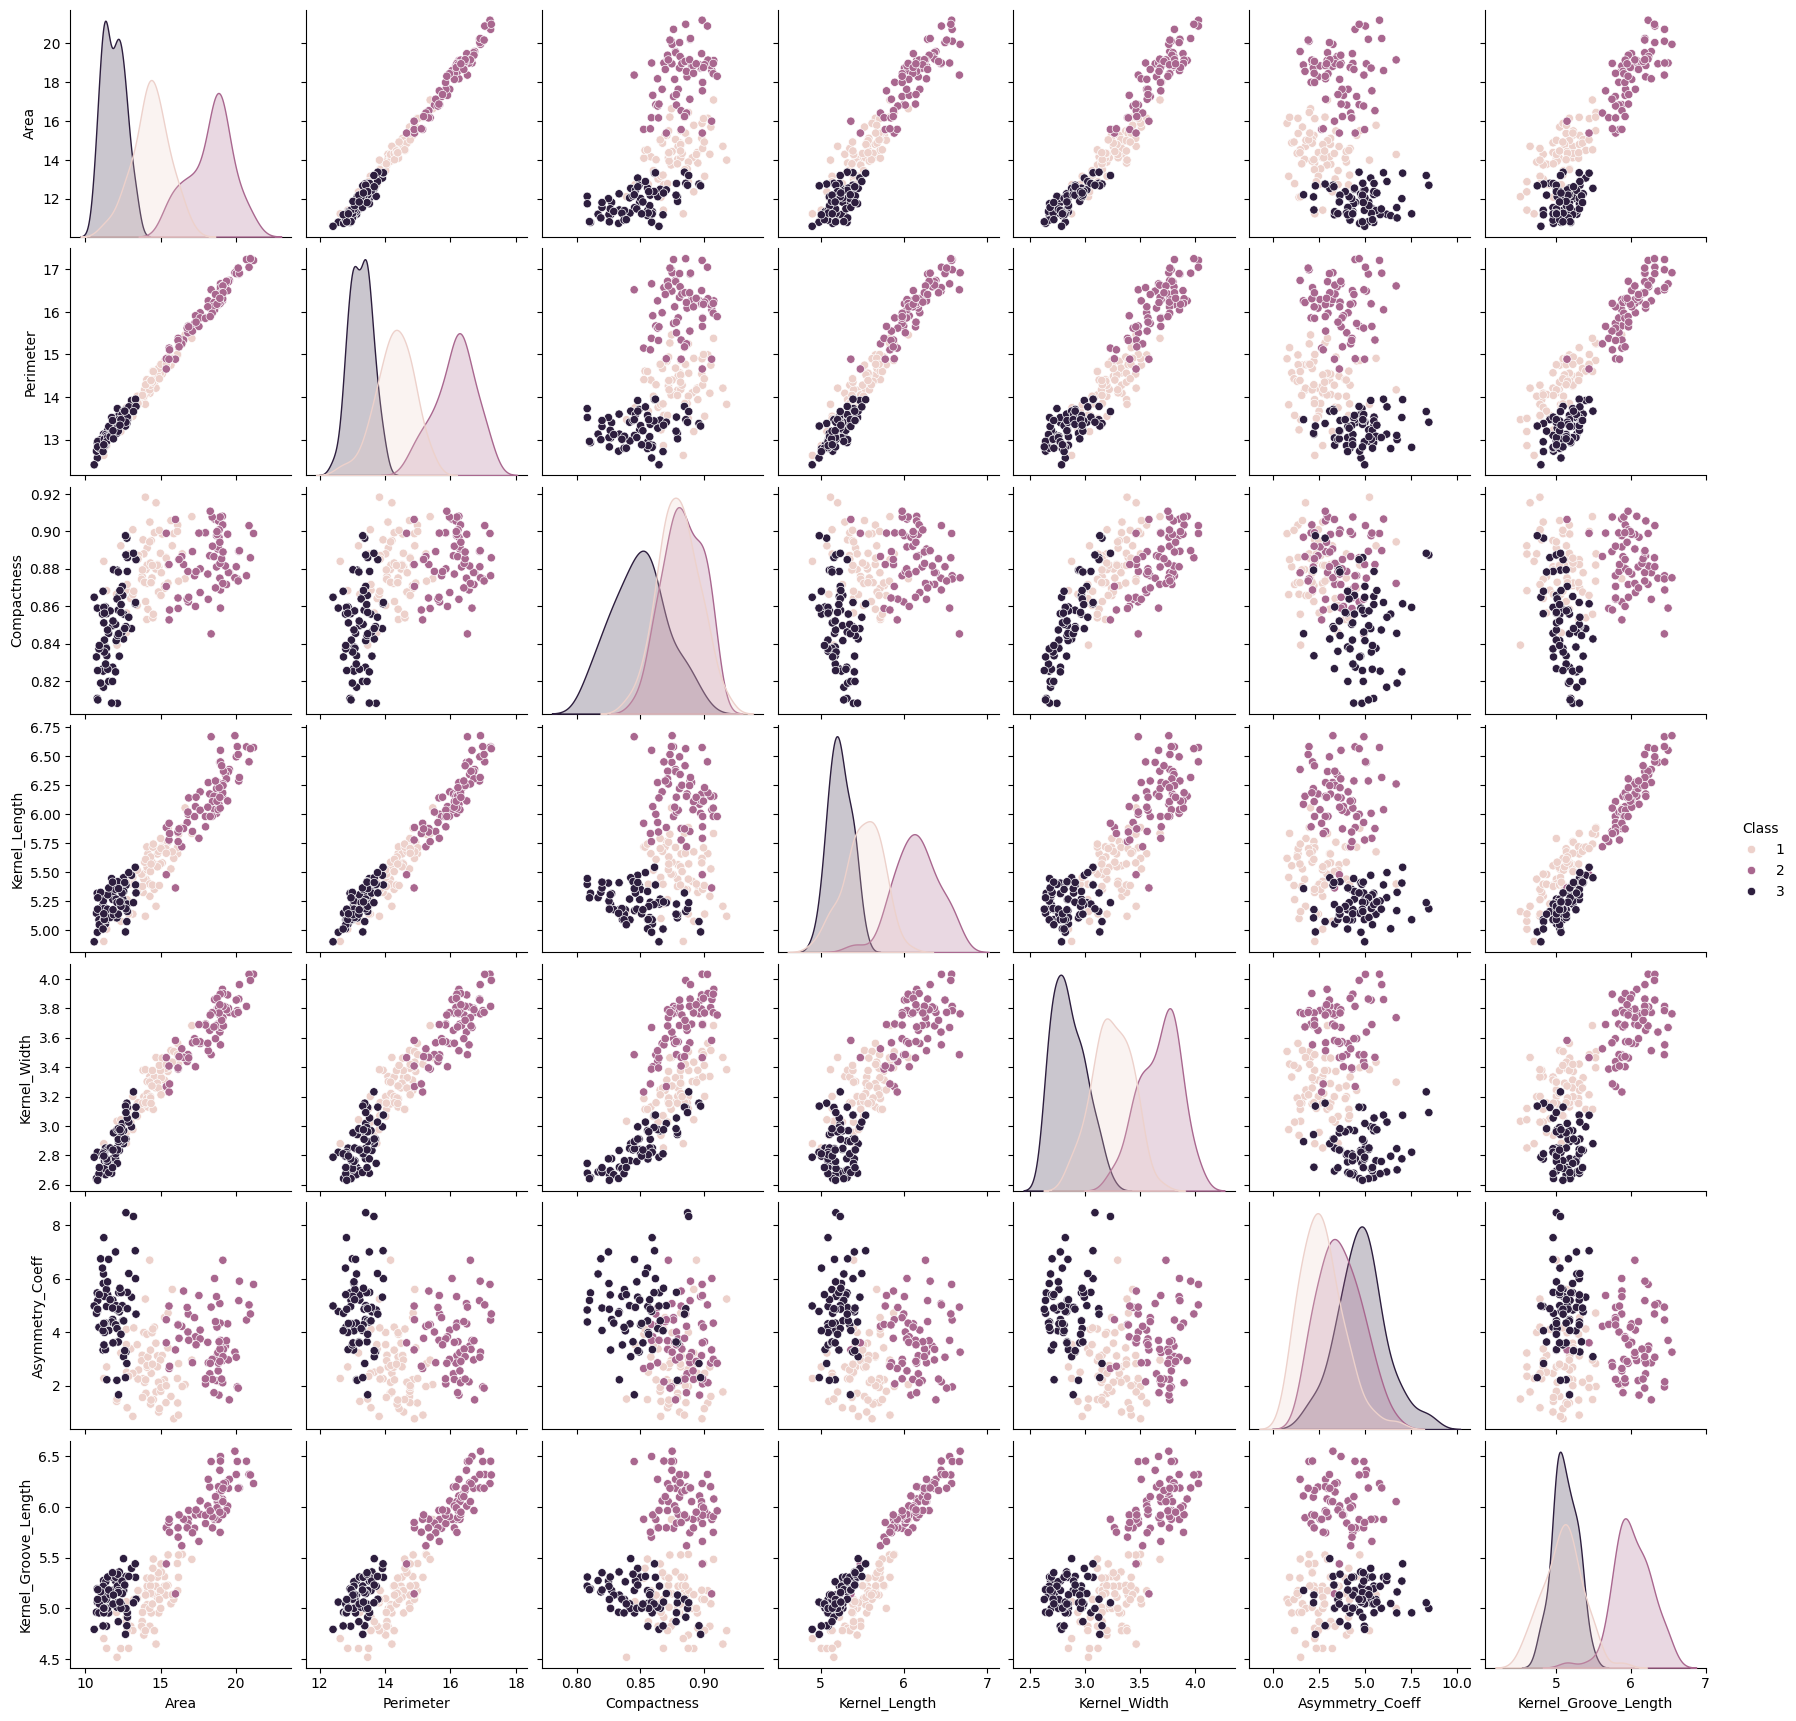

In [ ]:
# Histogramas
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

# Pairplot para correlações
sns.pairplot(df, hue='Class')
plt.show()

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

# Padronização dos dados
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]), columns=columns[:-1])
df_scaled['Class'] = df['Class']
df_scaled.head()

Area                    0
Perimeter               0
Compactness             0
Kernel_Length           0
Kernel_Width            0
Asymmetry_Coeff         0
Kernel_Groove_Length    0
Class                   0
dtype: int64


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove_Length,Class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1


In [ ]:
# Separar dados em treino e teste
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Treinar e avaliar modelos
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

print("\nResumo dos resultados:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")


KNN Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63


SVM Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.9

In [ ]:
# Exemplo de otimização com GridSearch para KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Melhores parâmetros KNN:", grid_knn.best_params_)

Melhores parâmetros KNN: {'n_neighbors': 5}


## Interpretação dos Resultados
- Compare os modelos com base nas métricas.
- Discuta qual modelo é mais adequado para a classificação de grãos.
- Sugira melhorias e próximos passos.
